# Support Vector Machines, Part 1

- These lecture notes are partially based on "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition, by Aurelien Geron (O'Reilly), 2022."

- Chapter 5: Hard margin and soft margin classification, quadratic programming formulation of linear SVM.

# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 6
### <center> Yoshihiro Shirai

#  0. Overview of the lecture
- We discuss support vector machines (SVM). These are powerful models that can be used for classification and regression.

- We formulate the hard margin and soft margin problem of fitting a linear SVM in terms of quadratic programming, which will be useful for understanding the kernal trick for nonlinear SVMs next lecture.

# 1. General concept of Support Vector Machines (SVM)

- SVM is one of the most popular ML technique that is capable of classification, regression, and outlier detection.

- We present the main idea behind SVM before going into details.

# 1.1. Large margin classification

- Consider the following subset of iris data.

- In the figure, we show three different decision boundaries (that is, three different classifiers)

- The dashed boundary is terrible (it doesn't even correctly classify the training set). The other two perfectly classify the training set, however, they get very close to each class. One can imagine that they will not perform well on new data.

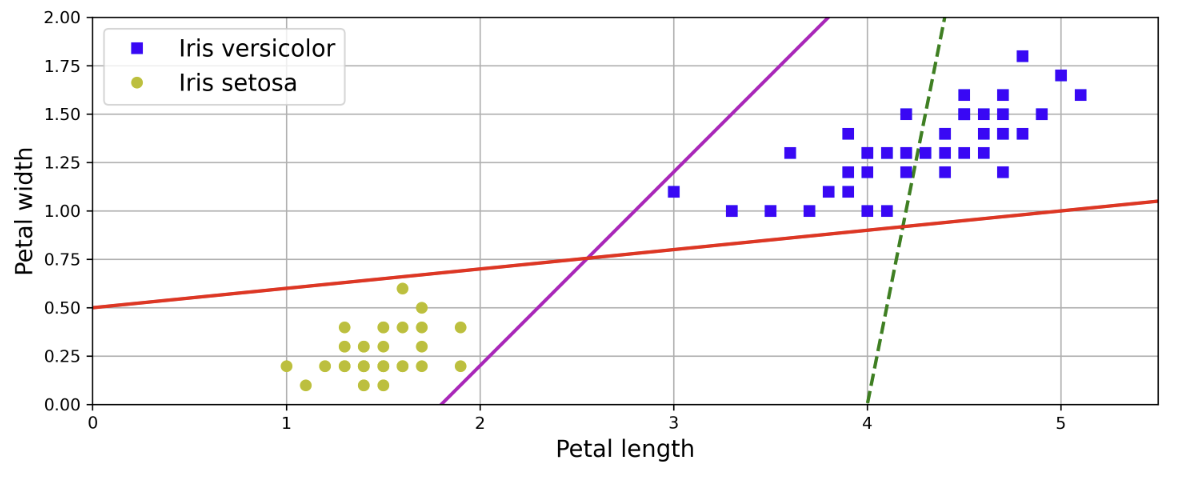

In [1]:
from IPython.display import Image
Image("Figs/badclassifiers.png",width=600)

- What is a good decision boundary then? Let us only assume linear boundaries.

- It should:
    - separate the observations in different classes; and,
    - be as far away as possible from the two classes. That is, it should have the largest distance from the nearest observations of each class.

- This idea is called large margin classification, the band between the two classes is called the margin.

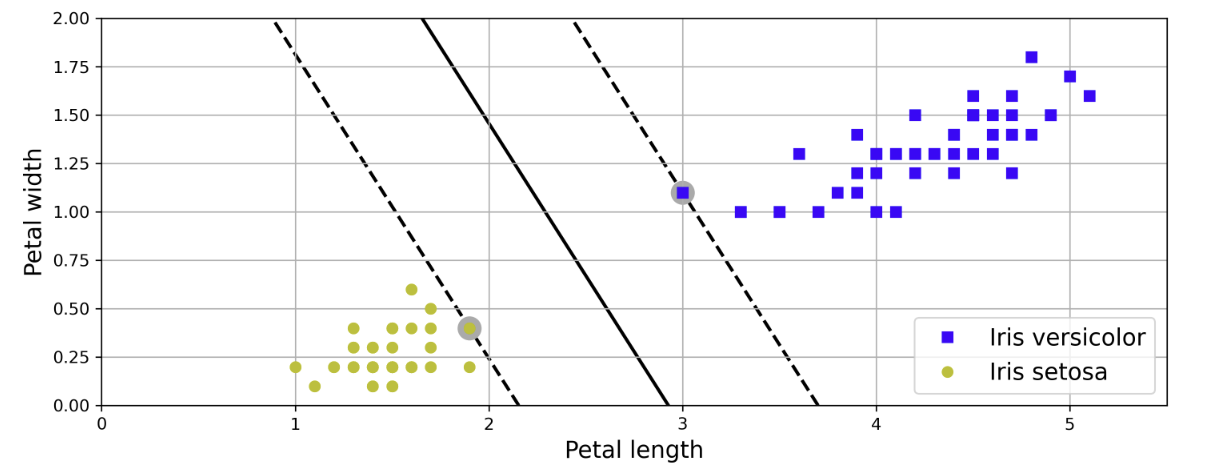

In [2]:
Image("Figs/large_margin_classification_plot.png",width=600)

- Note that in large margin classification, the decision boundary is completely determined by the **nearest observations** (which are highlighted). These observations are called **support vectors** (hence the name support vector machines).

- The decision boundary will not change if we add observations that are further away from the decision boundary than the support vectors.

- SVM is sensitive to scaling. Indeed, bad scaling changes the support vector, as the following figures illustrate.

- When using SVM, always standardize your numerical features (say, using scikit-learn's `StandardScaler`).

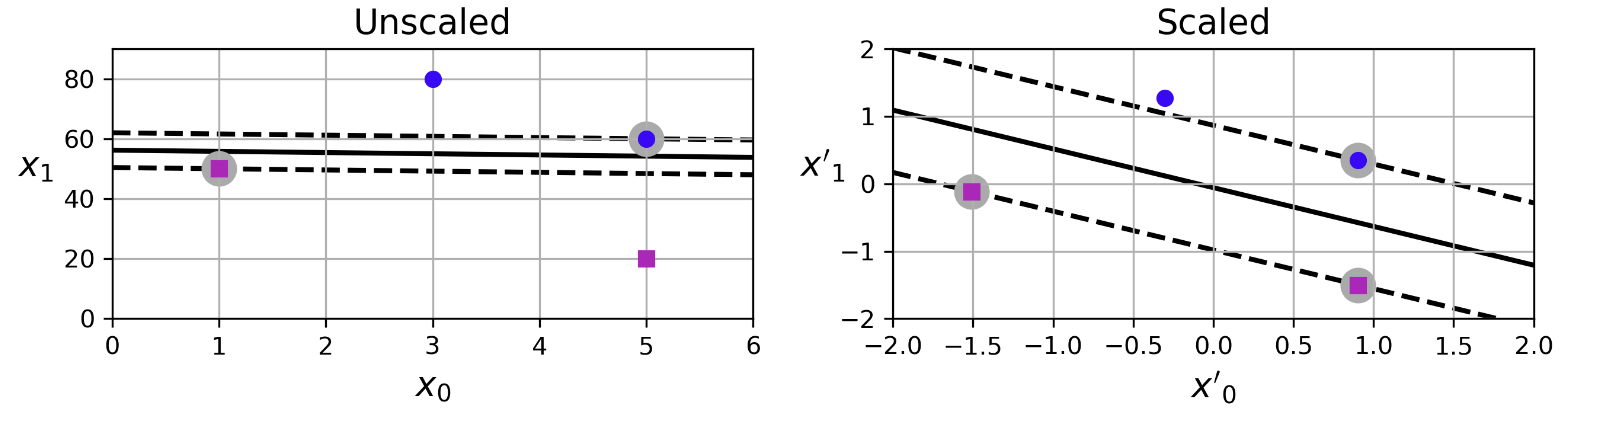

In [3]:
Image("Figs/sensitivity_to_feature_scales_plot.png",width=800)

# 1.2. Hard and soft margin classification

- In the examples above, we required that each class be on one side of the decision boundary. This is called hard margin classification

- The problem with hard margin classification is that it is very sensitive to outliers. As the following figures illustrate, adding a single outlier dramatically changes a hard margin. It may even be impossible to find a hard margin!

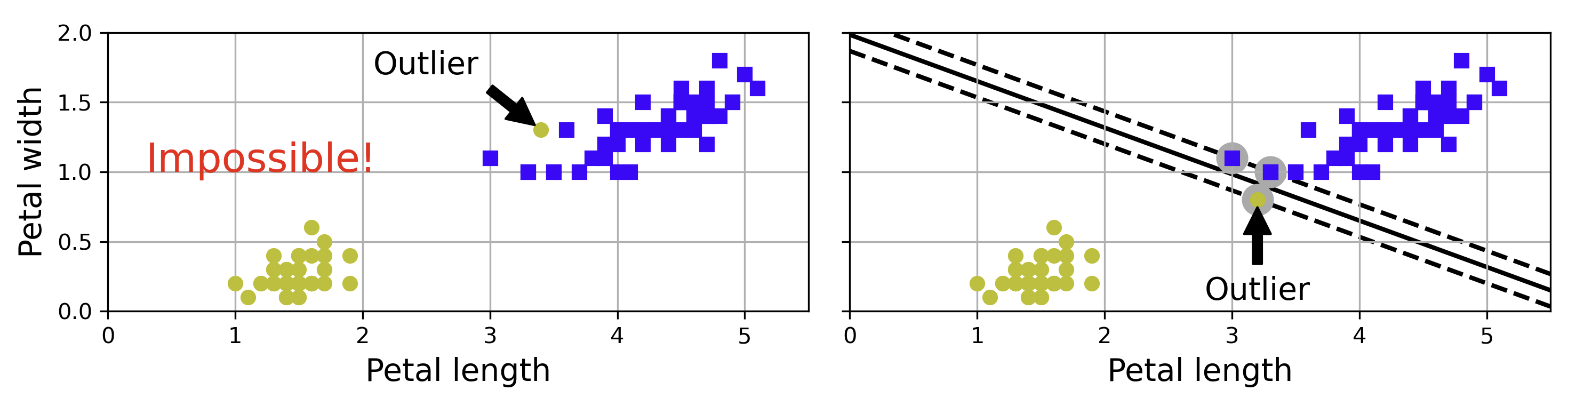

In [4]:
Image("Figs/sensitivity_to_outliers_plot.png",width=800)

- To address this issue, one should allow for margin violations (i.e. an observation on the "wrong side" of the decision boundary). This is called soft margin classification.

- We can then find a balance between maximizing the margin while minimizing the number (and size) of margin violations. As in regularizing linear models, this trade-off is govern by the penalty function and also a regularization parameter (when creating an SVM model using Scikit-Learn, this is `C`).

# 2. Hard margin formulation of linear SVMs

- Next, we explain the inner-workings of linear SVMs for classification.

- If you recall from our general discussion of classifiers, a classifier assign a score to each vector of features according to a decision function. It then assigns each observation to a class according to its score.

- For linear SVMs, the decision function is as simple as it gets: a linear function

- A feature vector $\mathbf{x}_n=(x_{n,1},...,x_{n,K})$ is assigned the score $s(\mathbf{x})=\mathbf{w}\cdot\mathbf{x}+b$ for feature weights $\mathbf{w}=(w_1,...,w_K)$ and bias $b$.

- Here, $\mathbf{w}$ and $b$ are the parameters of the model which are obtained by training.

- If $s(\mathbf{x})\geq 0$, we assign the positive label (say, 1). Otherwise, we assign the negative label (say, -1).

- For a given $\mathbf{w}$ and $b$, let the margins be the contours of $s(\mathbf{x})$ corresponding to the values $\pm 1$, that is, the (M-1)-dimensional hyperplanes $\mathbf{w}\cdot\mathbf{x}+b=1$ and $\mathbf{w}\cdot\mathbf{x}+b=-1$.

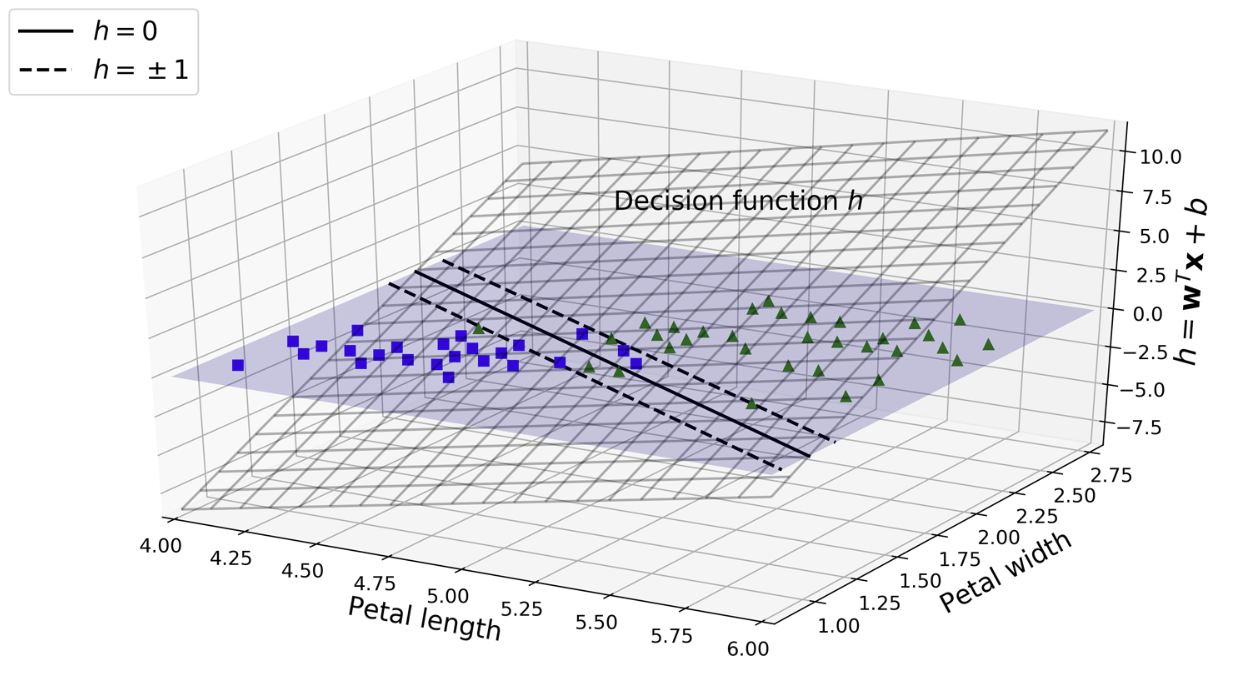

In [5]:
Image("Figs/decision_function_and_margin.png",width=600)

- In the hard margin formulation of the linear SV classifier, we need to consider the following:

    1. The actual positives must have positive scores. Indeed, their scores must be greater than or equal to 1 so that the positive observations are "off the street".

    2. Similarly, the negative observations must have negative scores. Indeed, their scores must be less than or equal to -1 so that they are "off the street".

    3. We want to maximize the margin size, that is, we want to find a "street" which is as wide as possible.

- Let $\{(\mathbf{x}_n,y_n)\}_{n=1}^N$ be the training set.

- To make the formulas simpler, we label the positive class as $+1$ and the negative class as $−1$. So, $y_n\in \{1,-1\}$

- Then, consideration (1) and (2) can be formulated as follows:

    - If $y_n=1$, then $s(\mathbf{x}_n)=\mathbf{w}\cdot\mathbf{x}+b\geq 1$
    - If $y_n=-1$, then $s(\mathbf{x}_n)=\mathbf{w}\cdot\mathbf{x}+b\leq -1$

- Note that we can combine these statements into the following constraint: $$y_n(\mathbf{w}\cdot\mathbf{x}+b)\geq 1; \quad n\in \{1,...,N\}$$

- Next, we find the margin size (i.e. the street width) as a function of the parameters

- For a given value of $\mathbf{w}$ and $b$, assume that $\mathbf{x}$ is on the decision boundary so that $s(\mathbf{x})=\mathbf{w}\cdot\mathbf{x}+b=0$

- Assume that the margin size is $d$

- We can then reach the positive margin of the street by moving in the direction perpendicular to the decision boundary for  $d/2$ units

- The direction $\nabla_{\mathbf{x}}s(\mathbf{x}) = \mathbf{w}$. So, $\mathbf{x}+\tfrac{d}{2}\tfrac{\mathbf{w}}{\|\mathbf{w}\|}$ must be on the positive margin. 

- So, if $s(\mathbf{x})=0$, we must have $$s\left( \mathbf{x}+\tfrac{d}{2}\tfrac{\mathbf{w}}{\|\mathbf{w}\|} \right)=1$$

- Expanding and noting that $s(\mathbf{x})=0$, we have 
$$\begin{align*}
\mathbf{w}\cdot\left( \mathbf{x}+\tfrac{d}{2}\tfrac{\mathbf{w}}{\|\mathbf{w}\|} \right)+b & = 1\\
(\mathbf{w}\cdot\mathbf{x}+b)+\tfrac{d}{2}\tfrac{\mathbf{w}\cdot \mathbf{w}}{\|\mathbf{w}\|} & = 1\\
d\frac{\|\mathbf{w}\|}{2}& = 1
\end{align*}$$

- Hence, $d=\frac{2}{\|\mathbf{w}\|}$

- Maximizing the margin (or the width of the street) is equivalent to **minimizing** $\|\mathbf{w}\|$.

- This is equivalent to minimizing $\frac{\|\mathbf{w}\|^2}{2}$, which has the advantage of being differentiable everywhere

- Finally, we obtain the optimization problem for finding the parameters $\mathbf{w}$ and $b$ in the hard margin formulation of SVM
$$\begin{align*}
&\min_{\mathbf{w},b}\frac{1}{2}\mathbf{w}^T\mathbf{w}\\
&\text{subject to:}\\
&y_n(\mathbf{w}\cdot\mathbf{x}+b)\geq 1
\end{align*}$$

- The objective function is quadratic in $\mathbf{w}$, while the constraints are linear in $\mathbf{w}$ and $b$

- This optimization problem is a **quadratic programming (QP)** problem, which is one of the most studied optimization problems with many efficient libraries to solve it.


# 3. Soft margin formulation of linear SVMs

- As mentioned earlier, the hard margin formulation is very inflexible. It is too sensitive to outliers and may not even be possible.

- Let us see how we can "relax" the hard margin constraint $$y_n(\mathbf{w}\cdot\mathbf{x}+b)\geq 1$$.

- Let us define the ***margin violation*** for the n-th observation as follows 
$$\max\{0,1-y_n(\mathbf{w}\cdot\mathbf{x}+b)\}=h(y_n(\mathbf{w}\cdot\mathbf{x}+b))$$

- The function $h(t):=\max\{0,1-t\}$ is called the **hinge loss** function.



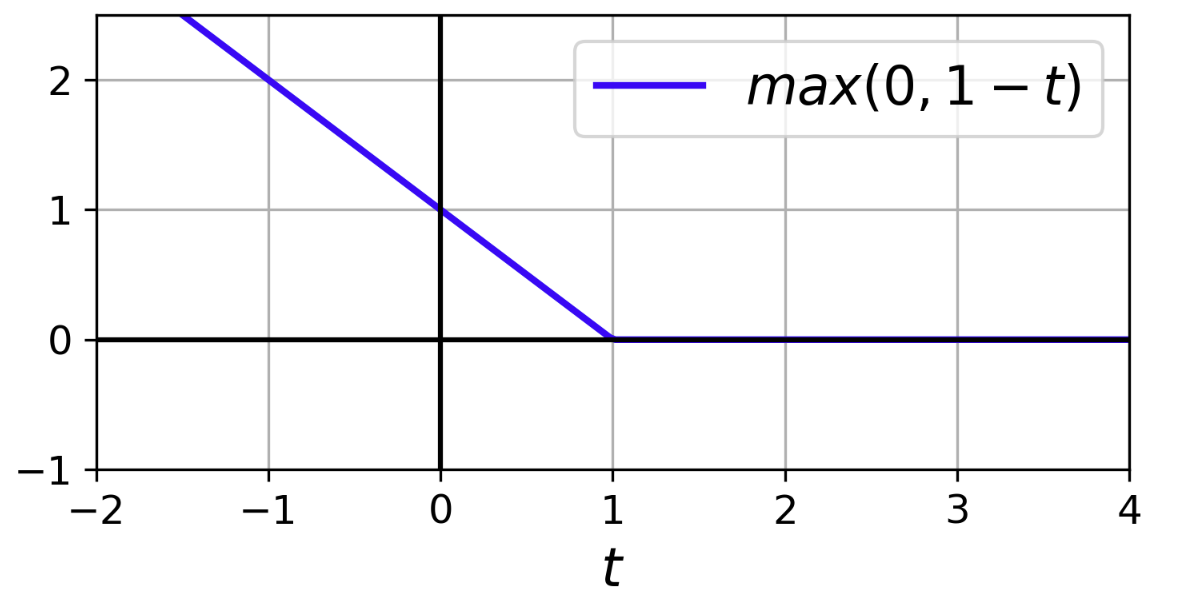

In [6]:
Image("Figs/hinge_plot.png",width=600)

- The hard margin constraint ensures that the margin violation is zero.

- To relax it, we can simply allow for positive margin violation but with a penalty term in the objective function penalizing margin violations.

- We then obtain the following optimization problem for the soft margin formulation of linear SVMs
$$\min_{\mathbf{w},b} \; J(\mathbf{w},b)$$
where the cost function is 
$$\begin{align*}
    J(\mathbf{w},b):=\frac{1}{2}\mathbf{w}^\top\mathbf{w} + C \sum_{n=1}^N \max\{0, 1 - y_n(\mathbf{w}\cdot\mathbf{x}_n + b)\}.
\end{align*}$$

- Here, we are maximizing the margin while minimizing the sum of margin violations.

- The hyperparameter $C>0$ determines how important margin violations are.

- $C = 0$ means that we do not care about violations at all. What would be the optimal value of $\mathbf{w}$ and $b$ in this case?

    - Clearly, $\mathbf{w}=0$ and $b$ would be arbitrary, so that all points are classificed into the same class

- A very large value of $C$ would push margin violations to zero, effectively reverting to hard margin SVM

- Thus, a larger $C$ means less regularization. If an SVM is overfitting (say, as indicated by the learning curves), we reduce $C$.



- How can we solve the optimization problem $$\min_{\mathbf{w},b} \; J(\mathbf{w},b)?$$

- This optimization problem is unconstrained. We can use, for instance, any variation of the GD algorithm to solve it.

- As it turns out, however, the convergence rate of the GD algorithm is not as good as the QP formulation of the soft margin SVM, which we discuss next.

- Note also, that the margin violation of the n-th observation is the smallest constant $\zeta_n\ge0$ that satisfies $$\begin{align*}
    y_n(\mathbf{w}\cdot\mathbf{x}_n + b) + \zeta_n \ge 1.\end{align*}$$ (Convince yourself that this is true. Consider the cases where the hard margin constraint is violated and is not violated)

- Thus, we can formulate the linear soft margin SVM classifier as the following optimization problem $$\begin{align*}
    &\min_{\mathbf{w},b,\zeta_1,\dots,\zeta_N} \frac{1}{2}\mathbf{w}^\top\mathbf{w} + C \sum_{n=1}^N \zeta_n\\
    &\text{subject to:}\\
    &y_n(\mathbf{w}\cdot\mathbf{x}_n + b) + \zeta_n \ge 1; \quad\quad n\in\{1,\dots,N\},\\
    &\zeta_n \ge 0; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

- This optimization problem is also a QP, like the hard margin SVM.

# 4. Dual formulation of linear SV classifier

## 4.1 The dual formulation of a constrained optimization problem
- If there are more features than observations (that is,  $K>N$ ), it would be better to solve the so-called Dual of the QP problems above.

- Consider a constrained optimization problem
$$\begin{align*}
    &\min_{\mathbf{x}} f(\mathbf{x})\\
    &\text{subject to:}\tag{Primal}\\
    &h_n(\mathbf{x}) \ge 0; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

## 4.2 The dual of the hard margin formulation of the SVM

- The Lagrangian dual problem corresponding to the primal problem above is
\begin{align*}
    &\max_{\mathbf{x},\mathbf{\lambda}}\, L(\mathbf{x}, \mathbf{\lambda}) = f(\mathbf{x})-\sum_{n=1}^N \lambda_n h_n(\mathbf{x}),\\
    &\text{subject to:}\tag{Dual}\\
    & \nabla_{\mathbf{x}} L(\mathbf{x},\mathbf{\lambda}) = 0,\\
    &\lambda_n \ge 0; \quad\quad n\in\{1,\dots,N\}.
\end{align*}

- Assume that $(\mathbf{\lambda}^*,\mathbf{x}^*)$ is the solution of the Dual problem. 

- Under some conditions (which are satisfied by the QP problems above), we have:

    1. $\mathbf{x}^*$ is also the solution of the Primal problem
    
    2. The <strong>complimentary slackness</strong> condition holds $$\begin{align*}\lambda_n^* \times h_n(\mathbf{x}^*) = 0.\end{align*}$$

- Let us find the dual of the hard-margin formulation.
$$\begin{align*}
    &\min_{\mathbf{w},b} \frac{1}{2}\mathbf{w}^\top\mathbf{w}\\
    &\text{subject to:}\\
    &y_n(\mathbf{w}\cdot\mathbf{x}_n + b) \ge 1; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

- The Lagrangian 
$$\begin{align*}
    L(\mathbf{w},b,\mathbf{\lambda}) &= \frac{1}{2}\mathbf{w}^\top\mathbf{w} - \sum_{n=1}^N \lambda_n\left[ y_n(\mathbf{w}\cdot\mathbf{x}_n + b) - 1\right]\\
    &=\frac{1}{2}\mathbf{w}^\top\mathbf{w} - \mathbf{w} \cdot \sum_{n=1}^N y_n \lambda_n \mathbf{x}_n - b\,\sum_{n=1}^N \lambda_n y_n + \sum_{n=1}^N \lambda_n.
\end{align*}$$

- Note that,
$$\begin{align*}
    &\nabla_\mathbf{w} L(\mathbf{w},b,\mathbf{\lambda}) = \mathbf{w} - \sum_{n=1}^N \lambda_n y_n\mathbf{x}_n,\\
    &\frac{\partial}{\partial b} L(\mathbf{w},b,\mathbf{\lambda}) = - \sum_{n=1}^N \lambda_n y_n.
\end{align*}$$

- So, the dual problem is
$$\begin{align*}
    &\max_{\mathbf{w},b,\lambda_1,\dots,\lambda_N} \frac{1}{2}\mathbf{w}^\top\mathbf{w} - \mathbf{w} \cdot \sum_{n=1}^N y_n \lambda_n \mathbf{x}_n - b\,\sum_{n=1}^N \lambda_n y_n + \sum_{n=1}^N \lambda_n\\
    &\text{subject to:}\\
    &\mathbf{w} = \sum_{n=1}^N \lambda_n y_n\mathbf{x}_n,\\
    & \sum_{n=1}^N \lambda_n y_n=0,\\
    &\lambda_n \ge 0; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

- We can simplify the dual problem. Using the constraints $\mathbf{w} = \sum_{n=1}^N \lambda_n y_n\mathbf{x}_n$ and $\sum_{n=1}^N \lambda_n y_n=0$, we obtain:
$$\begin{align*}
    &\frac{1}{2}\mathbf{w}^\top\mathbf{w} - \mathbf{w}\cdot\left(\sum_{n=1}^N \lambda_n y_n \mathbf{x}_n\right) - b \sum_{n=1}^N \lambda_n y_n +\sum_{n=1}^N \lambda_n\\
    & = \frac{1}{2}\mathbf{w}^\top\mathbf{w} - \mathbf{w}\cdot\mathbf{w} - b \times 0 +\sum_{n=1}^N \lambda_n\\
    & = \sum_{n=1}^N \lambda_n -\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_j y_i y_j (\mathbf{x}_i\cdot\mathbf{x}_j).
\end{align*}$$

- Thus, we obtain the dual form of the hard-margin SVM:
$$\begin{align*}
    &\max_{\lambda_1,\dots,\lambda_N} \sum_{n=1}^N \lambda_n -\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_j y_i y_j (\mathbf{x}_i\cdot\mathbf{x}_j)\\
    &\text{subject to:}\\
    &\lambda_n \ge 0; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

- Suppose that we solved the dual problem and obtained that the maximizer is $\mathbf{\lambda}^*=(\lambda_1^*,\dots,\lambda_N^*)$. How can we find the minimizers $\hat{\mathbf{w}}$ and $\hat{b}$ of the primal problem?

- $\hat{\mathbf{w}}$ is easy: simply use the constraint that we eliminated. That is $$\hat{\mathbf{w}} = \sum_{n=1}^N\lambda_n^*y_n\mathbf{x}_n$$.

- To find $\hat{b}$, we use the complementary slackness condition
$$\begin{align*}
    \lambda_n^*  \left[y_n(\hat{\mathbf{w}}\cdot \mathbf{x}_n + \hat{b})-1\right]=0.
\end{align*}$$

- If $\lambda_n^*>0$, then we must have
$$\begin{align*}
    &y_n(\hat{\mathbf{w}}\cdot \mathbf{x}_n + \hat{b})-1=0\\
    &\Longrightarrow\quad \hat{b} = \frac{1}{y_n} - \hat{\mathbf{w}}\cdot\mathbf{x}_n=y_n - \hat{\mathbf{w}}\cdot\mathbf{x}_n.
\end{align*}
$$

- Can you guess for which observations we have $\lambda_n^*>0$?

- Those for which the constraint becomes $y_n(\mathbf{w}\cdot\mathbf{x}_n + b) = 1$, these are the support vectors!

- We can use any support vector to calculate $\hat{b}$. But, it would be more stable if we take an average. Let $N_s$ be the number of support vectors, that is, the number of indices $n$ such that $\lambda_n^*>0$. We then use the following formula to obtain $\hat{b}$
$$\begin{align*}
    \hat{b} = \frac{1}{N_s} \sum_{n:\lambda_n^*>0}(y_n - \hat{\mathbf{w}}\cdot\mathbf{x}_n).
\end{align*}$$

- Once we found $\hat{\mathbf{w}}$ and $\hat{b}$, we classify a feature vector $\mathbf{x}$ by using the decision function $s(\mathbf{x})= \hat{\mathbf{w}}\cdot \mathbf{x} + \hat{b}$. Namely, if $\hat{\mathbf{w}}\cdot \mathbf{x} + \hat{b}\geq 0$, we assign the class $y=+1$, otherwise, we assign the class $y=-1$.

## 4.3 The dual of the soft margin formulation of the SVM

- Consider the soft margin formulation of linear SVM
$$\begin{align*}
    &\min_{\mathbf{w},b,\zeta_1,\dots,\zeta_N} \frac{1}{2}\mathbf{w}^\top\mathbf{w} + C \sum_{n=1}^N \zeta_n\\
    &\text{subject to:}\\
    &y_n(\mathbf{w}\cdot\mathbf{x}_n + b) + \zeta_n \ge 1; \quad\quad n\in\{1,\dots,N\},\\
    &\zeta_n \ge 0; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

- Using an argument as above, we can show that for the Dual problem is
$$\begin{align*}
    &\max_{\lambda_1,\dots,\lambda_N} \sum_{n=1}^N \lambda_n -\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_j y_i y_j (\mathbf{x}_i\cdot\mathbf{x}_j)\\
    &\text{subject to:}\\
    &0\le \lambda_n \le C; \quad\quad n\in\{1,\dots,N\}.
\end{align*}$$

- This is identical to the Dual problem of the hard margin SVM, except that now  $\lambda_n$  has an upper bound $C$.